In [1]:
##Added import for warnings###
import warnings
warnings.filterwarnings('ignore')

In [2]:
###Added libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

In [3]:
##Reading the dataset##
dayData=pd.read_csv('day.csv')

In [4]:
#finding shape
dayData.shape

(730, 16)

In [5]:
dayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Quality Check

In [6]:
##Checking if any null Value are their or not##
dayData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# dropping the instant column##
dayData.drop(['instant'],axis=1,inplace=True)

In [8]:
# dropping the dteday column###
dayData.drop(['dteday'],axis=1,inplace=True)

In [9]:
# dropping the casual ,registered column##
dayData.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
# checking the shape after dropping ##
dayData.shape

(730, 12)

Data Visualization

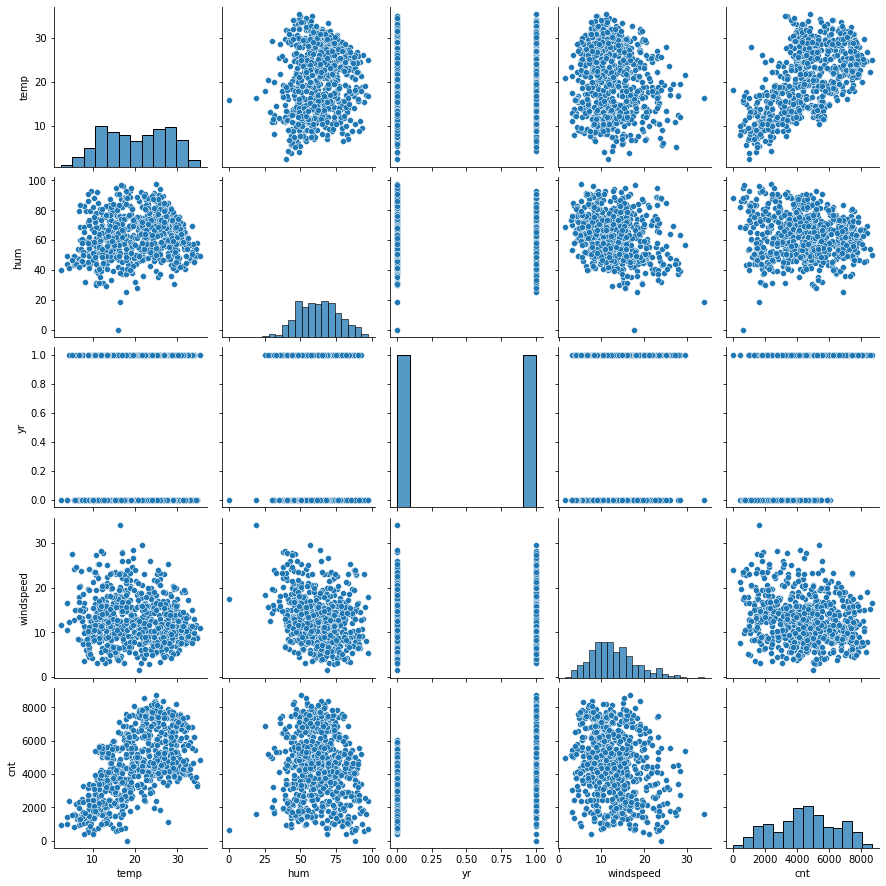

In [11]:
# Taking the pairplot####

sns.pairplot(dayData, vars=['temp','hum','yr','windspeed','cnt'])
plt.show()

#Inferences
#From the pairplot we can observe that with increase in temp cnt is increasing and viceversa  


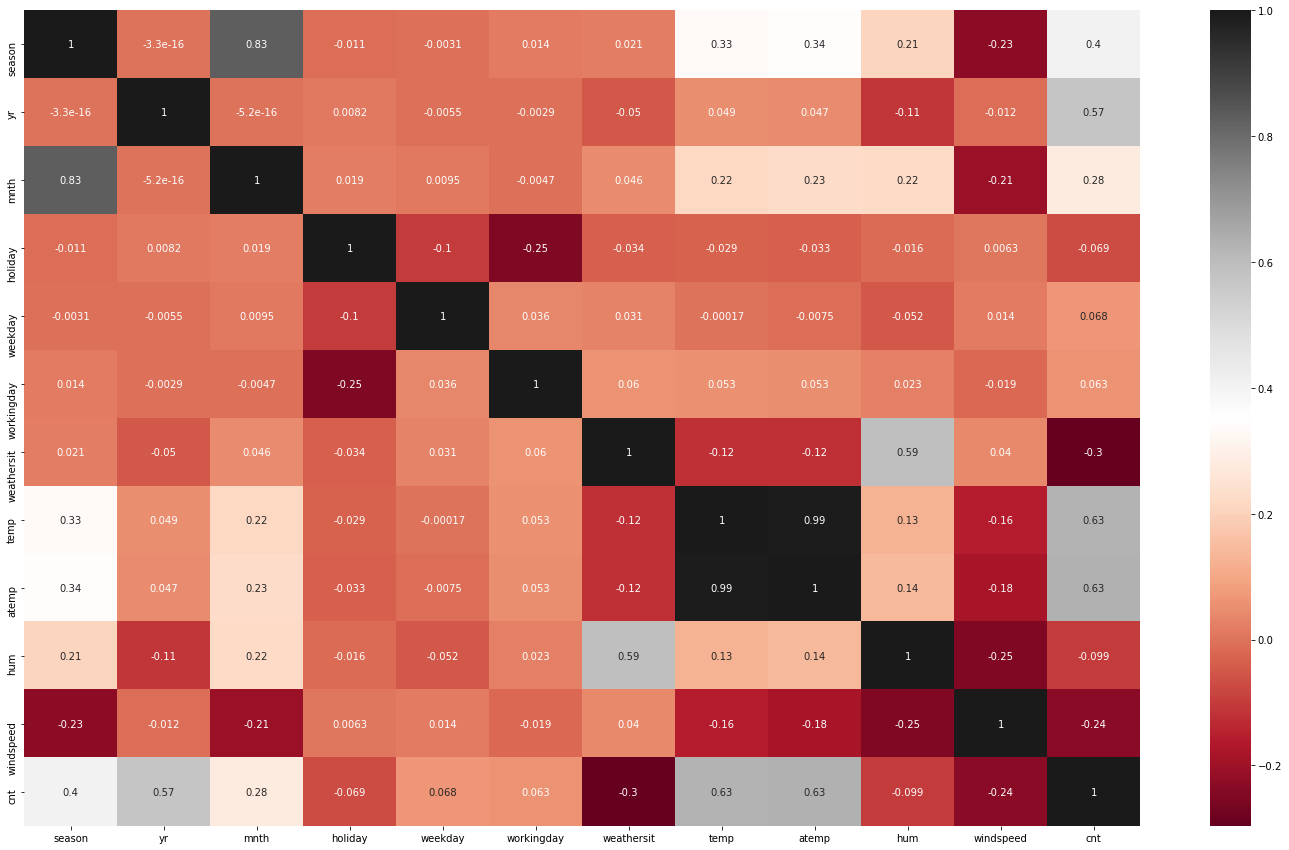

In [12]:
##Finding the correlation between different variables of numerical datatype##
plt.figure(figsize = (25, 15))
sns.heatmap(dayData.corr(), annot = True, cmap="RdGy")
plt.show()

##Inferences from correlation graph temp and cnt has positive corelation(0.63)

In [13]:
# maped the season column according to string value corresponding to the value in dataset
dayData['season'] = dayData['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to string value corresponding to the value in dataset
dayData['weekday'] = dayData['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values with numbers (1 to 12 ) from (jan to dec months) 
dayData['mnth'] = dayData['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit columnto string value corresponding to the value in dataset
dayData['weathersit'] = dayData['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})



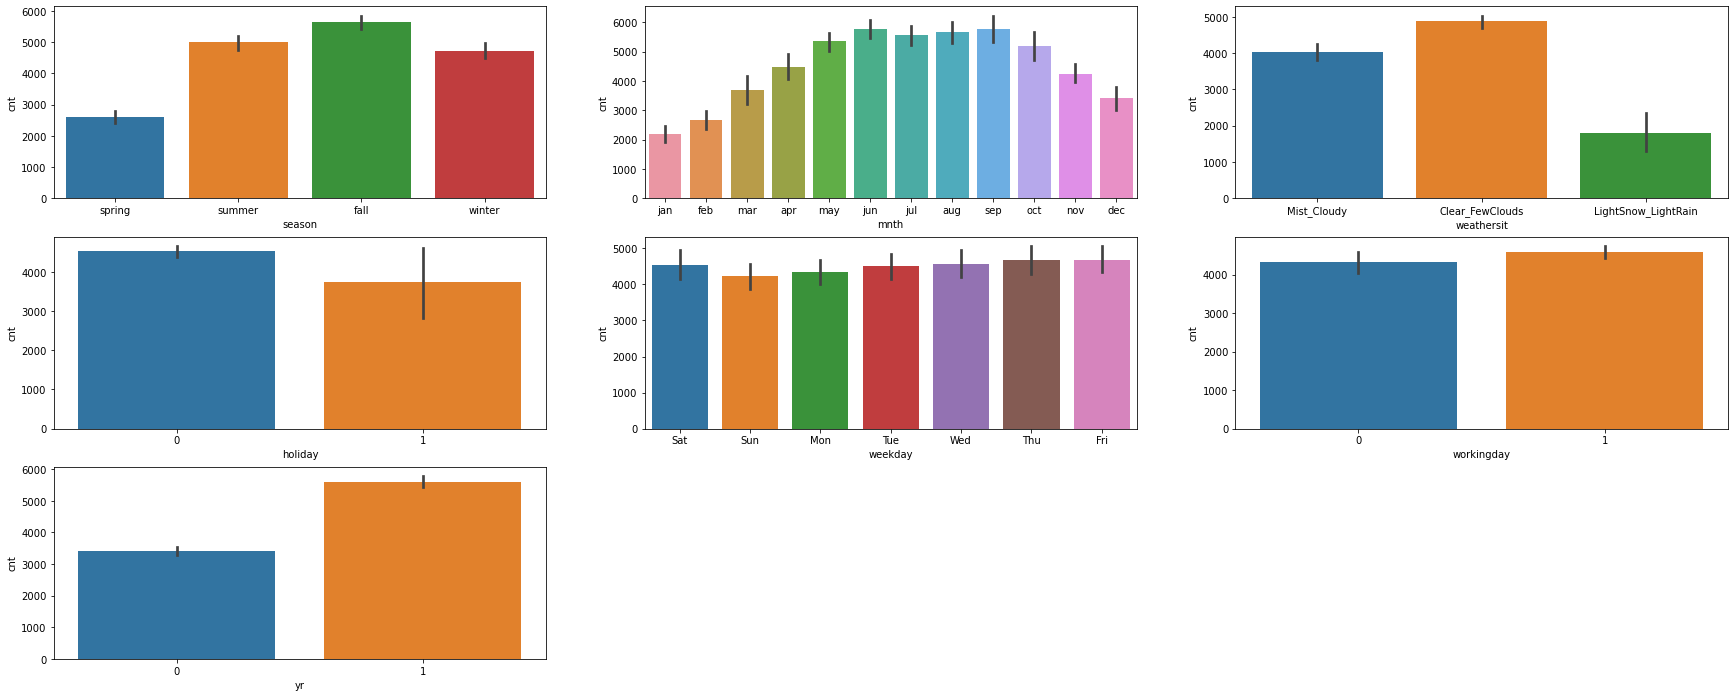

In [14]:
# Boxplot of categorical variables with cnt as target variable

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.barplot(x = 'season', y = 'cnt', data = dayData)
plt.subplot(3,3,2)
sns.barplot(x = 'mnth', y = 'cnt', data = dayData)
plt.subplot(3,3,3)
sns.barplot(x = 'weathersit', y = 'cnt', data = dayData)
plt.subplot(3,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data = dayData)
plt.subplot(3,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data = dayData)
plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = dayData)
plt.subplot(3,3,7)
sns.barplot(x = 'yr', y = 'cnt', data = dayData)
plt.show()


In [15]:
##Custom Function For calculating outliers##
def iqrCalculation(df,column):
    iqr = df[column].quantile(0.75)-df[column].quantile(0.25)
    HL = df[column].quantile(0.75)+iqr*1.5
    LL = df[column].quantile(0.25)-iqr*1.5
    per_outlier = ((df[column]<LL).sum()+(df[column]>HL).sum())/len(df[column])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)


Before Removing Outlierstemp


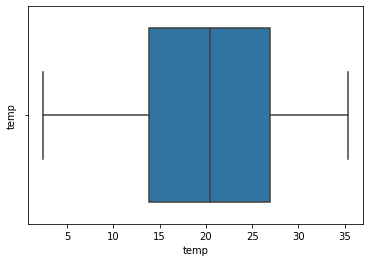

outliers counttemp->0.0
Before Removing Outliershum


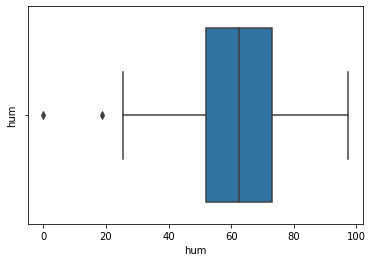

outliers counthum->0.27
Before Removing Outlierswindspeed


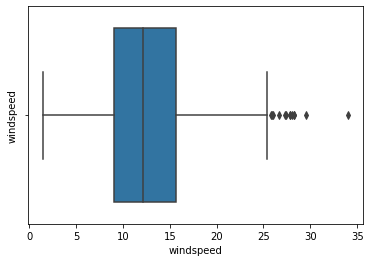

outliers countwindspeed->1.78


In [16]:
## After Removing the outliers of annual_inc column##
listtoRemoveOutliers=['temp','hum','windspeed']
for i in listtoRemoveOutliers:
    print("Before Removing Outliers"+i)
    sns.boxplot(dayData[i]).set(
        ylabel=i)
    plt.show()
    print("outliers count"+i+"->"+  str(iqrCalculation(dayData,i)) )  
    
    

In [17]:
# Creating  variables   'mnth', 'weekday', 'season' & 'weathersit' into category.


dayData['season']=dayData['season'].astype('category')
dayData['weathersit']=dayData['weathersit'].astype('category')
dayData['mnth']=dayData['mnth'].astype('category')
dayData['weekday']=dayData['weekday'].astype('category')

In [18]:
##creating dummy variables 
dummyvariables = pd.get_dummies(dayData[['season','weekday','mnth','weathersit']])

# concat the dummy variables to df 
dayData = pd.concat([dayData,dummyvariables], axis = 1)

# dropping the season,weekday,mnth,weather variables
dayData.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

dayData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_Clear_FewClouds,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
dayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   temp                            730 non-null    float64
 4   atemp                           730 non-null    float64
 5   hum                             730 non-null    float64
 6   windspeed                       730 non-null    float64
 7   cnt                             730 non-null    int64  
 8   season_fall                     730 non-null    uint8  
 9   season_spring                   730 non-null    uint8  
 10  season_summer                   730 non-null    uint8  
 11  season_winter                   730 non-null    uint8  
 12  weekday_Fri                     730 

# Splitting data into Training and Testing Sets

In [20]:
##Traing the data set##
np.random.seed(0)
dayData_train, dayData_test = train_test_split(dayData, train_size = 0.7,test_size=0.3, random_state = 100 )


In [21]:
print(dayData_train.shape)
print(dayData_test.shape)

(510, 34)
(219, 34)


In [22]:
# Apply scaler() to all numeric variables except the 'dummy' variables
scaler = MinMaxScaler()
numv=['atemp', 'hum','temp','windspeed','cnt']

dayData_train[numv]=scaler.fit_transform(dayData_train[numv])

In [23]:
#since target variable is count i am dropping count in y_train
y_train = dayData_train.pop('cnt')
X_train = dayData_train

In [24]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 19),
 ('hum', False, 18),
 ('windspeed', False, 15),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('weekday_Fri', False, 14),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 17),
 ('mnth_apr', False, 12),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 6),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 11),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weathersit_Clear_FewClouds', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'season_fall', 'season_spring',
       'season_winter', 'weekday_Sat', 'mnth_aug', 'mnth_jan', 'mnth_nov',
       'mnth_sep', 'weathersit_Clear_FewClouds',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [28]:
##List of variables not supported by rfe##
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'mnth_apr', 'mnth_dec', 'mnth_feb', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct'],
      dtype='object')

In [29]:
# Creating x_test dataframe with RFE supported variables##
X_train_rfeVal = X_train[col]

In [30]:
X_train_rfeVal.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'season_fall', 'season_spring',
       'season_winter', 'weekday_Sat', 'mnth_aug', 'mnth_jan', 'mnth_nov',
       'mnth_sep', 'weathersit_Clear_FewClouds',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [31]:

# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal.values, i) for i in range(X_train_rfeVal.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_Clear_FewClouds,22.39
14,weathersit_Mist_Cloudy,12.28
3,temp,3.62
4,season_fall,3.20
5,season_spring,2.73
6,season_winter,2.13
13,weathersit_LightSnow_LightRain,1.99
2,workingday,1.87
7,weekday_Sat,1.77
8,mnth_aug,1.67


In [32]:


# Adding a constant variable 
X_train_cv1 = sm.add_constant(X_train_rfeVal)

In [33]:
# Running the linear model
lm1=sm.OLS(y_train,X_train_cv1).fit()

In [34]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.0
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          7.92e-181
Time:                        00:29:21   Log-Likelihood:                 492.01
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     495   BIC:                            -890.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [35]:
##Selected  value mnth_nov  because  p value is high## 
X_train_rfeVal2 = X_train_rfeVal.drop(["mnth_nov"], axis = 1)

In [36]:

# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal2.values, i) for i in range(X_train_rfeVal2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_Clear_FewClouds,21.96
13,weathersit_Mist_Cloudy,12.09
3,temp,3.52
4,season_fall,3.15
5,season_spring,2.70
12,weathersit_LightSnow_LightRain,1.98
2,workingday,1.87
6,season_winter,1.80
7,weekday_Sat,1.77
8,mnth_aug,1.67


In [37]:
 

# Adding a constant variable 
X_train_cv2 = sm.add_constant(X_train_rfeVal2)

In [38]:
# Running the linear model
lm2=sm.OLS(y_train,X_train_cv2).fit()

In [39]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.73e-181
Time:                        00:29:24   Log-Likelihood:                 490.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
##Selecting mnth_jan  variable since it's p value is high##
X_train_rfeVal3 = X_train_rfeVal2.drop(["mnth_jan"], axis = 1)

In [41]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal3.values, i) for i in range(X_train_rfeVal3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_Clear_FewClouds,21.21
12,weathersit_Mist_Cloudy,11.59
3,temp,3.30
4,season_fall,3.11
5,season_spring,2.52
11,weathersit_LightSnow_LightRain,1.96
2,workingday,1.87
6,season_winter,1.78
7,weekday_Sat,1.77
8,mnth_aug,1.67


In [42]:
# Adding a constant variable 
X_train_cv3 = sm.add_constant(X_train_rfeVal3)

In [43]:
# Running the linear model
lm3=sm.OLS(y_train,X_train_cv3).fit()

In [44]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          3.35e-182
Time:                        00:29:25   Log-Likelihood:                 489.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     497   BIC:                            -898.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [45]:
##Selecting weathersit_Clear_FewClouds  since it's vif value is high##
X_train_rfeVal4 = X_train_rfeVal3.drop(["weathersit_Clear_FewClouds"], axis = 1)

In [46]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal4.values, i) for i in range(X_train_rfeVal4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.71
2,workingday,4.81
4,season_fall,4.11
0,yr,2.06
7,weekday_Sat,1.85
8,mnth_aug,1.85
6,season_winter,1.70
5,season_spring,1.66
11,weathersit_Mist_Cloudy,1.55
9,mnth_sep,1.48


In [47]:
# Adding a constant variable 
X_train_cv4 = sm.add_constant(X_train_rfeVal4)

In [48]:
# Running the linear model
lm4=sm.OLS(y_train,X_train_cv4).fit()

In [49]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          3.35e-182
Time:                        00:29:27   Log-Likelihood:                 489.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     497   BIC:                            -898.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [50]:
##selecting holiday considering its p value which is 0.42 since its all variables vif values are below 10##
X_train_rfeVal5 = X_train_rfeVal4.drop(["holiday"], axis = 1)

In [51]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal5.values, i) for i in range(X_train_rfeVal5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.33
1,workingday,4.36
3,season_fall,4.10
0,yr,2.06
7,mnth_aug,1.85
6,weekday_Sat,1.75
5,season_winter,1.66
4,season_spring,1.57
10,weathersit_Mist_Cloudy,1.55
8,mnth_sep,1.47


In [52]:
# Adding a constant variable 
X_train_cv5 = sm.add_constant(X_train_rfeVal5)

In [53]:
# Running the linear model
lm5=sm.OLS(y_train,X_train_cv5).fit()

In [54]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.75e-182
Time:                        00:29:29   Log-Likelihood:                 487.66
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     498   BIC:                            -900.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [55]:
##dropping season_summer to reduce features and also taking its p value under consideration which is 0.021 since allvif are less than 10##
X_train_rfeVal6 = X_train_rfeVal5.drop(["mnth_aug"], axis = 1)

In [56]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal6.values, i) for i in range(X_train_rfeVal6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.31
1,workingday,4.36
3,season_fall,3.01
0,yr,2.05
6,weekday_Sat,1.75
5,season_winter,1.66
4,season_spring,1.57
9,weathersit_Mist_Cloudy,1.53
7,mnth_sep,1.27
8,weathersit_LightSnow_LightRain,1.07


In [57]:
# Adding a constant variable 
X_train_cv6 = sm.add_constant(X_train_rfeVal6)

In [58]:
# Running the linear model
lm6=sm.OLS(y_train,X_train_cv6).fit()

In [59]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.55e-182
Time:                        00:29:31   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [60]:
##for reducing count of features dropping season_winter since all the variables have pvalues 0.00 ##
##reason for removing season_winter it is not causing the performance to fall 82 to 77  which is happening when i remove temp with high vif of 7.76 and other variables  
X_train_rfeVal7 = X_train_rfeVal6.drop(["season_winter"], axis = 1)

In [61]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal7.values, i) for i in range(X_train_rfeVal7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.05
1,workingday,4.20
3,season_fall,2.50
0,yr,2.04
5,weekday_Sat,1.70
8,weathersit_Mist_Cloudy,1.52
4,season_spring,1.40
6,mnth_sep,1.25
7,weathersit_LightSnow_LightRain,1.05


In [62]:
# Adding a constant variable 
X_train_cv7 = sm.add_constant(X_train_rfeVal7)

In [63]:
# Running the linear model
lm7=sm.OLS(y_train,X_train_cv7).fit()

In [64]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.2
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          5.99e-181
Time:                        00:29:33   Log-Likelihood:                 478.33
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     500   BIC:                            -894.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [65]:
##for reducing count of features dropping weekday_Sat instead of using workingday and windspeed because dropping this variables is causing the efficiency to fall to 75.7 directly and more feaures are still existing  ##
X_train_rfeVal8 = X_train_rfeVal7.drop(["weekday_Sat"], axis = 1)

In [66]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal8.values, i) for i in range(X_train_rfeVal8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.43
1,workingday,2.89
3,season_fall,2.45
0,yr,2.04
7,weathersit_Mist_Cloudy,1.50
4,season_spring,1.29
5,mnth_sep,1.25
6,weathersit_LightSnow_LightRain,1.04


In [67]:
# Adding a constant variable 
X_train_cv8 = sm.add_constant(X_train_rfeVal8)

In [68]:
# Running the linear model
lm8=sm.OLS(y_train,X_train_cv8).fit()

In [69]:
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.14e-178
Time:                        00:29:36   Log-Likelihood:                 469.41
No. Observations:                 510   AIC:                            -920.8
Df Residuals:                     501   BIC:                            -882.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [70]:
##Dropping working day simce its p value is higher than 0.05  ##
X_train_rfeVal9 = X_train_rfeVal8.drop(["workingday"], axis = 1)

In [71]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal9.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal9.values, i) for i in range(X_train_rfeVal9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.94
2,season_fall,2.41
0,yr,2.03
6,weathersit_Mist_Cloudy,1.47
4,mnth_sep,1.25
3,season_spring,1.22
5,weathersit_LightSnow_LightRain,1.04


In [72]:
# Adding a constant variable 
X_train_cv9 = sm.add_constant(X_train_rfeVal9)

In [73]:
# Running the linear model
lm9=sm.OLS(y_train,X_train_cv9).fit()

In [74]:
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     311.7
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          3.23e-178
Time:                        00:29:39   Log-Likelihood:                 466.02
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     502   BIC:                            -882.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [75]:
# List down final model variables with their coefficients

# assign final model to lm_final
lmfinal = lm9

# list down and check variables of final model
varfinal = list(lmfinal.params.index)
varfinal.remove('const')


# will display the final varible
print("final list of variables !!!")
print(round(lmfinal.params,3))

final list of variables !!!
const                             0.232
yr                                0.234
temp                              0.451
season_fall                      -0.062
season_spring                    -0.149
mnth_sep                          0.095
weathersit_LightSnow_LightRain   -0.291
weathersit_Mist_Cloudy           -0.078
dtype: float64


# Test on TEST Data and calculating Residual Analysis

In [76]:
##predicting the training data and taking the count
y_train_cnt = lm9.predict(X_train_cv9)

Text(0.5, 0, 'Errors')

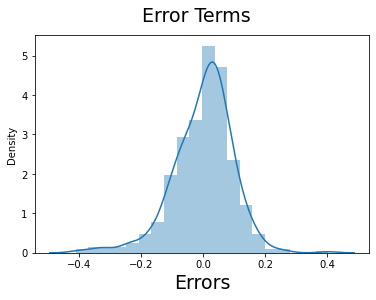

In [77]:
##Taking the residuals and plotting the graph
res = y_train-y_train_cnt

# Plot the histogram with the  error values
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)                         # X-label

In [78]:
##Performing the scaling operation test data numerical values
numericalval = ['atemp','hum','temp','windspeed','cnt']

dayData_test[numv] = scaler.transform(dayData_test[numericalval])

In [79]:
##popping count in y_test 
y_test = dayData_test.pop('cnt')
X_test = dayData_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              219 non-null    int64  
 1   holiday                         219 non-null    int64  
 2   workingday                      219 non-null    int64  
 3   temp                            219 non-null    float64
 4   atemp                           219 non-null    float64
 5   hum                             219 non-null    float64
 6   windspeed                       219 non-null    float64
 7   season_fall                     219 non-null    uint8  
 8   season_spring                   219 non-null    uint8  
 9   season_summer                   219 non-null    uint8  
 10  season_winter                   219 non-null    uint8  
 11  weekday_Fri                     219 non-null    uint8  
 12  weekday_Mon                     219

In [80]:
#Selecting the variables that were part of final model.
col_1=X_train_rfeVal9.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)
X_test_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           219 non-null    float64
 1   yr                              219 non-null    int64  
 2   temp                            219 non-null    float64
 3   season_fall                     219 non-null    uint8  
 4   season_spring                   219 non-null    uint8  
 5   mnth_sep                        219 non-null    uint8  
 6   weathersit_LightSnow_LightRain  219 non-null    uint8  
 7   weathersit_Mist_Cloudy          219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 7.9 KB


In [81]:
# Making predictions using the final model (lr9)

y_pred = lm9.predict(X_test_lm9)

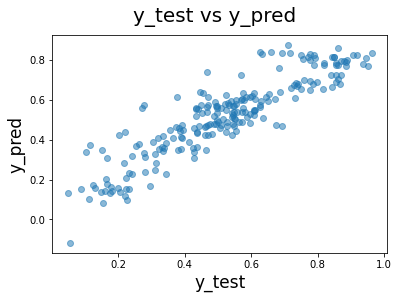

In [82]:
##plotting the graph between y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()


In [83]:
## Taking r2 score between y_test and y_pred
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8019476421302908

In [84]:
#Taking Adjusted R2 score
# n is number of rows in X

n = X_test.shape[0]


# Number of features i.e predictors and  p 
p = X_test.shape[1]

# We  will now find the Adjusted R-squared using the below formula

adjustedr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjustedr2

0.7953771847602056

From the Above analysis we can conclude the lm_9 has the variables with
good predictive power and model is efficient for predicting.

# Final Important Predictors

In [85]:
##printing final list of variables with their coefficients
print(round(lmfinal.params,3))

const                             0.232
yr                                0.234
temp                              0.451
season_fall                      -0.062
season_spring                    -0.149
mnth_sep                          0.095
weathersit_LightSnow_LightRain   -0.291
weathersit_Mist_Cloudy           -0.078
dtype: float64


# Final Analysis

# +ve Correlation:

1.Temp:With increase in temp the demand for bike is also increasing .
2.yr: With increase in yr the demand for bike is also increasing
3.mnth_sep : September month is also is seeing the increase in the demand for bike

# -ve Correlation Analysis

1.weathersit_LightSnow_LightRain :With negative coefficient we can observe a decrease in bike demand .
2.season_spring: With negative coefficient we can observe a decrease in bike demand
3.season_fall:With negative coefficient we can observe a decrease in bike demand .
3.weathersit_Mist_Cloudy:With negative coefficient we can observe a decrease in bike demand but less when compared to weathersit_LightSnow_LightRain.

FINAL LINEAR EQUATION
cnt=0.232+(0.234×yr)+(0.095×mnth_sep)+(0.451×temp)−(0.062×season_fall)-(0.149×season_spring)−(0.078×WeathersitMistCloudy)−(0.291×weathersitLightSnowLightRain)

Finally when taking final decision this variables need to be given uttmost importance